# feature-scaling

Use the "Run" button to execute the code.

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [19]:
# Execute this to save new versions of the notebook
jovian.commit(project="feature-scaling")

<IPython.core.display.Javascript object>

[jovian] Creating a new project "kartikaye-madhok/feature-scaling"
[jovian] Committed successfully! https://jovian.ai/kartikaye-madhok/feature-scaling


'https://jovian.ai/kartikaye-madhok/feature-scaling'

## 1. Introduction

Feature scaling is the process of normalising the range of features in a dataset.

Real-world datasets often contain features that are varying in degrees of magnitude, range and units. Therefore, in order for machine learning models to interpret these features on the same scale, we have to perform feature scaling.

In science, we all know the importance of comparing apples to apples and yet many people, especially beginners, have a tendency to overlook feature scaling as part of the preprocessing steps for machine learning. This has proven to cause models to make inaccurate predictions.

In this notebook, we will discuss why feature scaling is important, the difference between normalisation and standardisation as well as how feature scaling affects model accuracy. More specifically, we will explore the applications of 3 different types of scalers in the Scikit-learn library:

1. [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
2. [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
3. [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

## 2. Dependencies

In [29]:
# Data Wrangling

import pandas as pd
import numpy as np

# Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

#Warnings
import warnings
warnings.filterwarnings("ignore")

## 3. Import Dataset

For the purpose of this notebook, we will use one of the toy datasets in Scikit-learn library, the [Boston house prices dataset.](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)

You can find the description of the features [here.](https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-dataset)

In [30]:
from sklearn.datasets import load_boston
boston=load_boston()

data=pd.DataFrame(boston.data, columns=boston.feature_names)
data['target']=boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


The abreviations of the attributes is as follows:

1. CRIM per capita crime rate by town

2. ZN proportion of residential land zoned for lots over 25,000 sq.ft.

3. INDUS proportion of non-retail business acres per town

4. CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

5. NOX nitric oxides concentration (parts per 10 million)

6. RM average number of rooms per dwelling

7. AGE proportion of owner-occupied units built prior to 1940

8. DIS weighted distances to five Boston employment centres

9. RAD index of accessibility to radial highways

10. TAX full-value property-tax rate per $10,000

11. PTRATIO pupil-teacher ratio by town

12. B 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town

13. LSTAT % lower status of the population

14. MEDV Median value of owner-occupied homes in $1000’s

## 4. Data Analysis

In [3]:
# missing values and data type

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


It appears that there are no missing values, **which is great!!!**

It also appears that our independent variables and our target variables are of the `float64` data type

In [6]:
# Summary Statistics

data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


We can observe that our features span across different range of values. This may be attributed to the different units in wwhich these features were measured and recorded.

This is where feature scaling will help us solve this issue.

## 5. Understand the effects of Different Scalers

In this section, we will learn the distinction between `normalisation` and `standardisation.` Subsequently, we will look at the effects of 3 different feature scaling techniques in Scikit-learn.

### 5.1 Theory
Before we examine the effects of feature scaling, let us first go over some theories behind normalisation and standardisation.

#### 5.1.1 Normalisation

Normalisation, also known as min-max scaling, is a scaling technique whereby the values in a column are shifted so that they are bounded between a fixed range of 0 and 1.

**X_new = (X - X_min) / (X_max - X_min)**

[MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) is the Scikit-learn function for normalisation.

#### 5.1.2 Standardisation

On the other hand, standardisation or Z-score normalisation is another scaling technique whereby the values in a column are rescaled so that they demonstrate the properties of a standard Gaussian distribution, that is mean = 0 and variance = 1.

**X_new = (X - mean) / std**

[StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) is the Scikit-learn function for standardisation.

Unlike StandardScaler, [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html) scales features using statistics that are robust to outliers. More specifically, this scaler removes the median and scales the data according to the quantile range or by default, the interquartile range, thus making it less susceptible to outliers.


#### Normalisation V Standardisation

The choice between normalisation or standardisation comes down to the application.

Standardisation is generally preferred over normalisation in most machine learning context as it is especially important in order to compare the similarities between features based on certain distance measures. This is most prominent in [Principal Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis) where we are interested in the components that maximise the variance.

Normalisation, on the other hand, also offers many practical applications particularly in computer vision and image processing where pixel intensities have to be normalised to fit within a the RGB colour range between 0 and 255. Furthermore, neural network algorithms typically require data to be normalised to a 0-1 scale before model training.

At the end of the day, there is no definitive answer as to whether you should normalise or standardise your data. One can always apply both techniques and compare the model performance for the best results.

### 5.2 Application

Now that we have a theoretical understanding of feature scaling, let's see how they work in practice.

In [14]:
# Get predictor and target variables

X = data.drop('target', axis = 1)
Y = data['target']

# X, Y shape

print("X shape: ", X.shape)
print("Y shape: ", Y.shape)

X shape:  (506, 13)
Y shape:  (506,)


In [15]:
# Create Objects for MinMaxScaler, StandardScaler and RobustScaler

norm=MinMaxScaler()
standard=StandardScaler()
robust=RobustScaler()

In [18]:
# MinMaxScaler
normalised_features = norm.fit_transform(X)
normalised_df = pd.DataFrame(normalised_features, index = X.index, columns = X.columns)

# StandardScaler
standardised_features = standard.fit_transform(X)
standardised_df = pd.DataFrame(standardised_features, index = X.index, columns = X.columns)

# RobustScaler
robust_features = robust.fit_transform(X)
robust_df = pd.DataFrame(robust_features, index = X.index, columns = X.columns)

To demonstrate the effects of different scalers, I have chosen to examine the following features in our dataset before and after implementing feature scaling:

1. **ZN** [ZN proportion of residential land zoned for lots over 25,000 sq.ft.]
2. **AGE** [AGE proportion of owner-occupied units built prior to 1940]
3. **TAX** [TAX full-value property-tax rate per $10,000]
4. **B** [B 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town]

#### 5.2.2 Visualisations

**NOTE** I came across a very intersting pandas function called [pd.melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html)
--------------------------------------------------------------------------------------------------------------------------
This function is useful to massage a DataFrame into a format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars), are “unpivoted” to the row axis, leaving just two non-identifier columns, ‘variable’ and ‘value’.

Text(0, 0.5, '')

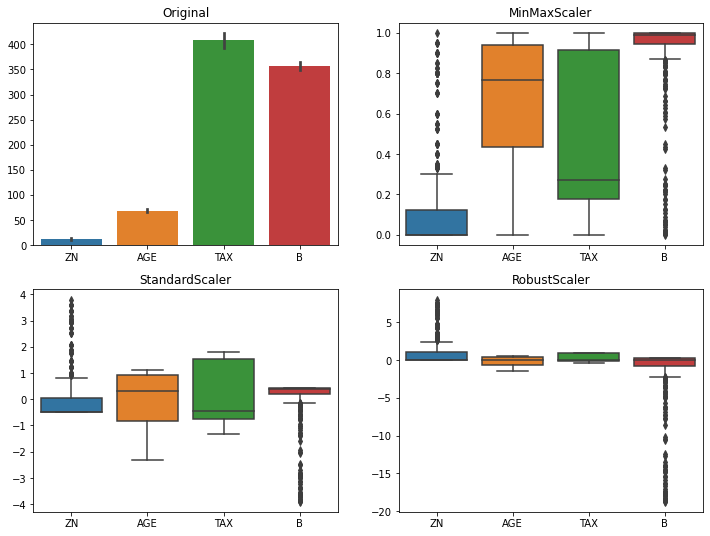

In [21]:
# Create Subplots

fig, ax = plt.subplots(2,2,figsize=(12,9))



#Original

sns.barplot(x='variable', y='value', data=pd.melt(data[['ZN','AGE','TAX','B']]), ax=ax[0,0])
ax[0,0].set_title('Original')
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('')

# MinMaxScaler

sns.boxplot(x = 'variable', y = 'value', data = pd.melt(normalised_df[['ZN', 'AGE', 'TAX', 'B']]), ax = ax[0, 1])
ax[0, 1].set_title('MinMaxScaler')
ax[0, 1].set_xlabel('')
ax[0, 1].set_ylabel('')

#StandardScaler

sns.boxplot(x = 'variable', y = 'value', data = pd.melt(standardised_df[['ZN', 'AGE', 'TAX', 'B']]), ax = ax[1, 0])
ax[1, 0].set_title('StandardScaler')
ax[1, 0].set_xlabel('')
ax[1, 0].set_ylabel('')

#RobustScaler

sns.boxplot(x = 'variable', y = 'value', data = pd.melt(robust_df[['ZN', 'AGE', 'TAX', 'B']]), ax = ax[1, 1])
ax[1, 1].set_title('RobustScaler')
ax[1, 1].set_xlabel('')
ax[1, 1].set_ylabel('')

As we can see, our original features have wildly different ranges.

MinMaxScaler has rescaled our features so that their values are bounded between 0 and 1.

StandardScaler and RobustScaler, on the other hand, have rescaled our features so that they are distributed around the mean of 0.

## 6. Compare Model Accuracy

I mentioned in the introduction of this tutorial that unscaled data can adversely impact a model's ability to make accurate predictions but so far, we have not discussed exactly how and why they do. In fact, feature scaling does not always improve a model's performance. Some models do not require feature scaling.

In this section, we will explore the following classes of machine learning algorithms and discuss whether or not feature scaling impact their performance:

1. Gradient descent based algorithms
2. Distance-based algorithms
3. Tree-based algorithms

### 6.1 Theory

Let's first go over some concepts behind those algorithms and think about how and why feature scaling might be important to each of them.

Cheatsheet.
---
![](https://i.imgur.com/aOZsaWa.png)

#### 6.1.1 Gradient Descent Based Algorithms

Gradient desent is an iterative optimisation algorithm that takes us to the minimum of a function. Machine learning algorithms like `linear regression` and `logistic regression` rely on gradient descent to minimise their loss functions or in other words, to reduce the error between the predicted values and the actual values.

Having features with varying range of values will cause different step sizes for each feature. Therefore, to ensure that gradient descent converges more smoothly and quickly, we need to scale our features so that they have a similar scale.

#### 6.1.2 Distance Based Algorithms

The underlying algorithms to distance-based models make them the most susceptible to unscaled data.

Algorithms like `k-nearest neighbours`, `support vector machines` and `k-means clustering` use the distance between data points to determine their similarity. Hence, features with a greater magnitude will be given a higher weightage by the model. This is not an ideal scenario as we do not want our algorithm to be heavily biased towards a single feature.

Evidently, it is important that we implement feature scaling to our data before fitting them to distance-based algorithms to ensure that all features contribute equally to the result.

#### 6.1.3 Tree Based Algorithms

Each node in a `Classification And Regression Trees (CART)` model, otherwise known as `Decision Trees` represents a single feature in a dataset. The tree splits each node in such a way that it increases the homogeneity of that node. This split is not affected by the other features in the dataset.

For that reason, we can conclude that decision trees are invariant to the scale of the features and therefore do not require feature scaling. This includes other ensemble models that are also tree-based such as random forest and gradient boosting.


### 6.2 Proof Of Concept

Now that we understand the types of models that are sensitive and insensitive to feature scaling, let us now convince ourselves with a concrete example using the Boston house prices dataset.

Here, I have chosen 2 distance-based algorithms (`KNN` and `SVR`) as well as 1 tree-based algorithm (`decision trees regressor`) to predict the house prices.

We should expect to see an improved model performance with feature scaling under KNN and SVR and a constant model performance under decision trees with and without feature scaling.

Feel free to experiment with other types of models like linear regression, random forest and gradient boosting!

In [23]:
# Creating Objects

knn = KNeighborsRegressor()
svr = SVR()
tree = DecisionTreeRegressor(max_depth=10, random_state=42)

#Create list of Different Scalers

scalers = [norm, standard, robust]

In [24]:
# Train test split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (379, 13)
Y_train shape:  (379,)
X_test shape:  (127, 13)
Y_test shape:  (127,)


Before we get started, I think it is important to highlight the good practice of first fitting the scalers to the training set and then use that to transform the data in the test set. This is to prevent any data leakage and misleading accuracy scores.

Here, I will construct a pipeline which contains a scaler and a model to fit and transform the features and subsequently make predictions using each model. The accuracy of these predictions are then evaluated using root mean squared error. The smaller the error, the better the model performance.

#### 6.2.1 KNN

In [31]:
knn_rmse = []

# Without feature scaling

knn.fit(X_train, Y_train)
pred = knn.predict(X_test)
knn_rmse.append(np.sqrt(mean_squared_error(Y_test, pred)))

# Apply different scaling techniques and make predictions using KNN 

for scaler in scalers:
    pipe = make_pipeline(scaler, knn)
    pipe.fit(X_train, Y_train)
    pred = pipe.predict(X_test)
    knn_rmse.append(np.sqrt(mean_squared_error(Y_test, pred)))

# Show results     

knn_df = pd.DataFrame({'RMSE': knn_rmse}, index = ['Original', 'MinMaxScaler', 'StandardScaler', 'RobustScaler'])
knn_df

,RMSE
Original,5.023266
MinMaxScaler,4.534415
StandardScaler,4.487861
RobustScaler,4.404341


As expected, the errors are much smaller with feature scaling than without feature scaling. In other words, our model performed better using scaled features.

In this instance, KNN performed best under `RobustScaler.`

#### 6.2.2 SVR

In [32]:
svr_rmse = []

# Without feature scaling

svr.fit(X_train, Y_train)
pred = svr.predict(X_test)
svr_rmse.append(np.sqrt(mean_squared_error(Y_test, pred)))

# Apply different scaling techniques and make predictions using SVR

for scaler in scalers:
    pipe = make_pipeline(scaler, svr)
    pipe.fit(X_train, Y_train)
    pred = pipe.predict(X_test)
    svr_rmse.append(np.sqrt(mean_squared_error(Y_test, pred)))

# Show results

svr_df = pd.DataFrame({'RMSE': svr_rmse}, index = ['Original', 'MinMaxScaler', 'StandardScaler', 'RobustScaler'])
svr_df

,RMSE
Original,7.020270
MinMaxScaler,5.127946
StandardScaler,5.033967
RobustScaler,5.323447


Similar to KNN, SVR also performed better with scaled features as seen by the lower errors.

In this instance, SVR performed best under StandardScaler.

#### 6.2.3 Decision Tree

In [33]:
tree_rmse = []

# Without feature scaling

tree.fit(X_train, Y_train)
pred = tree.predict(X_test)
tree_rmse.append(np.sqrt(mean_squared_error(Y_test, pred)))

# Apply different scaling techniques and make predictions using decision tree

for scaler in scalers:
    pipe = make_pipeline(scaler, tree)
    pipe.fit(X_train, Y_train)
    pred = pipe.predict(X_test)
    tree_rmse.append(np.sqrt(mean_squared_error(Y_test, pred)))

# Show results 

tree_df = pd.DataFrame({'RMSE': tree_rmse}, index = ['Original', 'MinMaxScaler', 'StandardScaler', 'RobustScaler'])
tree_df

,RMSE
Original,3.306176
MinMaxScaler,3.306176
StandardScaler,3.306176
RobustScaler,3.306176


As expected, decision tree is insensitive to all feature scaling techniques as seen in the constant RMSE across scaled and unscaled features.

## 7. Conclusion

To summarise, feature scaling is the process of transforming the features in a dataset so that their values share a similar scale.

In this notebook, we have learned the difference between normalisation and standardisation as well as 3 different scalers in the Scikit-learn library: MinMaxScaler, StandardScaler and RobustScaler.

We also learned that gradient descent and distance-based algorithms require feature scaling while tree-based algorithms do not. We managed to prove this via an example with the Boston house prices dataset and comparing the model accuracy with and without feature scaling.

## 8. References

1. [Feature Scaling for Machine Learning: Understanding the Difference Between Normalization vs. Standardization](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)

2. [Normalization vs Standardization](https://www.geeksforgeeks.org/normalization-vs-standardization/)

## 9. Follow me on other platforms

1. [Linkedln](https://www.linkedin.com/in/kartikaye-madhok-80a50298/)
2. [Github](https://github.com/AceVentura7)
3. [Medium](https://medium.com/@kartikaye.madhok)